## **Analisis y clasificación de las reviews y comentarios en el sector de los videojuegos**
## **ANÁLISIS COMENTARIOS**

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
import pandas as pd
import time
from time import sleep, strftime
import random
from random import randint
import shutil
import pickle
import os
import nltk
import nltk.text
import nltk.corpus
from wordcloud import WordCloud, STOPWORDS
from time import sleep, strftime
import numpy as np
import re
import matplotlib.pyplot as plt

In [5]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [6]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [9]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [6]:
df=pd.read_pickle('/Users/Eugenio/Documents/comentarios_usuarios_ps4_3.pkl')

In [7]:
df.head()

,Titulo,Plataforma,Fecha_salida,Puntuacion_usuarios,Numero_criticas_usuarios_positivas,Numero_criticas_usuarios_mixtas,Numero_criticas_usuarios_negativas,Puntuaciones_usuarios,Usuarios,Fecha_review_usuarios,Reviews_usarios,Usuarios_ayudados,Usuarios_ayudados_total
0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,"5,005",517,556,"[8, 10, 7, 10, 4, 2, 3, 10, 10, 10, 6, 7, 10, ...","[J4MESOX4D, DareJedi, CardinalStorm, Xgamertro...","[Nov 19, 2014, Nov 18, 2014, Nov 23, 2014, Nov...",[GTA V was arguably one of the most anticipate...,"[19, 70, 16, 15, 77, 53, 47, 1, 1, 1, 1, 3, 8,...","[33, 138, 34, 40, 207, 144, 130, 1, 1, 1, 1, 4..."
1,Persona 5 Royal,PlayStation 4,"Mar 31, 2020",8.3,"2,224",116,405,"[8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 5,...","[sfhdfde, BUP_BOI, Ethxyz, Sephiroth667, smahl...","[Apr 11, 2020, May 10, 2020, May 5, 2020, Apr...",[TL;DR\nI was a huge fan of the original perso...,"[18, 20, 18, 19, 18, 18, 17, 15, 18, 73, 20, 2...","[22, 25, 23, 25, 24, 24, 23, 21, 26, 113, 33, ..."
2,The Last of Us Remastered,PlayStation 4,"Jul 29, 2014",9.2,"13,970",442,703,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[DemaKosharbekov, JoBo52, Eros, Kaniya, Darleh...","[Jun 18, 2020, Aug 5, 2014, Aug 1, 2014, Jul...","[Вместо тысяча слов , я скажу что это лучшая и...","[23, 33, 25, 52, 28, 24, 27, 27, 27, 23, 38, 3...","[24, 40, 31, 65, 35, 30, 34, 34, 34, 29, 48, 4..."
3,Dragon Quest XI S: Echoes of an Elusive Age - ...,PlayStation 4,"Dec 4, 2020",8.8,55,4,5,"[9, 10, 9, 10, 10, 8, 7, 6]","[Ali1983, KingMike860, MahOgre, dnztanaci, The...","[Dec 8, 2020, Dec 10, 2020, Dec 12, 2020, Dec...",[this game is soo classic and it's worth your ...,"[4, 4, 2, 6, 4, 3, 0, 0]","[4, 4, 2, 7, 5, 4, 5, 4]"
4,Persona 5,PlayStation 4,"Apr 4, 2017",8.7,"4,154",161,496,"[9, 9, 9, 10, 9, 9, 10, 10, 9, 10, 10, 10, 10,...","[Carda1972, Volitile88, Nightscape, Trunks252,...","[Apr 19, 2017, Apr 16, 2017, Apr 21, 2017, May...",[A great game. I loved P3 and P4 maybe a bit m...,"[105, 79, 78, 16, 53, 42, 53, 65, 45, 63, 44, ...","[115, 88, 87, 18, 60, 48, 61, 75, 52, 73, 51, ..."


In [8]:
df.isnull().sum()/len(df)*100

Titulo                                0.000000
Plataforma                            0.000000
Fecha_salida                          0.000000
Puntuacion_usuarios                   0.151439
Numero_criticas_usuarios_positivas    0.000000
Numero_criticas_usuarios_mixtas       0.000000
Numero_criticas_usuarios_negativas    0.000000
Puntuaciones_usuarios                 9.742554
Usuarios                              9.742554
Fecha_review_usuarios                 9.742554
Reviews_usarios                       9.742554
Usuarios_ayudados                     9.742554
Usuarios_ayudados_total               9.742554
dtype: float64

In [9]:
print('Valores perdidos Puntuacion_usuarios:', sum(df.Puntuacion_usuarios.isnull().values.ravel()))
print('Valores perdidos Usuarios:', sum(df.Usuarios.isnull().values.ravel()))

Valores perdidos Puntuacion_usuarios: 3
Valores perdidos Usuarios: 193


In [10]:
df.dropna(axis=0, inplace = True)

In [13]:
df=df.reset_index()

In [14]:
df.head()

,index,Titulo,Plataforma,Fecha_salida,Puntuacion_usuarios,Numero_criticas_usuarios_positivas,Numero_criticas_usuarios_mixtas,Numero_criticas_usuarios_negativas,Puntuaciones_usuarios,Usuarios,Fecha_review_usuarios,Reviews_usarios,Usuarios_ayudados,Usuarios_ayudados_total
0,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,"5,005",517,556,"[8, 10, 7, 10, 4, 2, 3, 10, 10, 10, 6, 7, 10, ...","[J4MESOX4D, DareJedi, CardinalStorm, Xgamertro...","[Nov 19, 2014, Nov 18, 2014, Nov 23, 2014, Nov...",[GTA V was arguably one of the most anticipate...,"[19, 70, 16, 15, 77, 53, 47, 1, 1, 1, 1, 3, 8,...","[33, 138, 34, 40, 207, 144, 130, 1, 1, 1, 1, 4..."
1,1,Persona 5 Royal,PlayStation 4,"Mar 31, 2020",8.3,"2,224",116,405,"[8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 5,...","[sfhdfde, BUP_BOI, Ethxyz, Sephiroth667, smahl...","[Apr 11, 2020, May 10, 2020, May 5, 2020, Apr...",[TL;DR\nI was a huge fan of the original perso...,"[18, 20, 18, 19, 18, 18, 17, 15, 18, 73, 20, 2...","[22, 25, 23, 25, 24, 24, 23, 21, 26, 113, 33, ..."
2,2,The Last of Us Remastered,PlayStation 4,"Jul 29, 2014",9.2,"13,970",442,703,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[DemaKosharbekov, JoBo52, Eros, Kaniya, Darleh...","[Jun 18, 2020, Aug 5, 2014, Aug 1, 2014, Jul...","[Вместо тысяча слов , я скажу что это лучшая и...","[23, 33, 25, 52, 28, 24, 27, 27, 27, 23, 38, 3...","[24, 40, 31, 65, 35, 30, 34, 34, 34, 29, 48, 4..."
3,3,Dragon Quest XI S: Echoes of an Elusive Age - ...,PlayStation 4,"Dec 4, 2020",8.8,55,4,5,"[9, 10, 9, 10, 10, 8, 7, 6]","[Ali1983, KingMike860, MahOgre, dnztanaci, The...","[Dec 8, 2020, Dec 10, 2020, Dec 12, 2020, Dec...",[this game is soo classic and it's worth your ...,"[4, 4, 2, 6, 4, 3, 0, 0]","[4, 4, 2, 7, 5, 4, 5, 4]"
4,4,Persona 5,PlayStation 4,"Apr 4, 2017",8.7,"4,154",161,496,"[9, 9, 9, 10, 9, 9, 10, 10, 9, 10, 10, 10, 10,...","[Carda1972, Volitile88, Nightscape, Trunks252,...","[Apr 19, 2017, Apr 16, 2017, Apr 21, 2017, May...",[A great game. I loved P3 and P4 maybe a bit m...,"[105, 79, 78, 16, 53, 42, 53, 65, 45, 63, 44, ...","[115, 88, 87, 18, 60, 48, 61, 75, 52, 73, 51, ..."


In [15]:
df1 = df.set_index('index')[['Puntuaciones_usuarios', 'Usuarios', 'Fecha_review_usuarios', 'Reviews_usarios', 'Usuarios_ayudados', 'Usuarios_ayudados_total']].apply(pd.Series.explode)

In [16]:
df1

,Puntuaciones_usuarios,Usuarios,Fecha_review_usuarios,Reviews_usarios,Usuarios_ayudados,Usuarios_ayudados_total
index,,,,,,
0,8,J4MESOX4D,"Nov 19, 2014",GTA V was arguably one of the most anticipated...,19,33
0,10,DareJedi,"Nov 18, 2014",Small things are important. GTA V has a lot of...,70,138
0,7,CardinalStorm,"Nov 23, 2014","PS4 VERSION:\n\nUpon first impressions, I thou...",16,34
0,10,XgamertronX,"Nov 18, 2014","This is not merely a port , many new things ha...",15,40
0,4,MaxBenevolent,"Nov 18, 2014","First of all, if this were the release of last...",77,207
...,...,...,...,...,...,...
1786,1,JakeK86,"Sep 9, 2019",Handling is stiff and absolutely terrible. The...,0,0
1787,0,SZJX,"May 4, 2018",This series might have tried to look cool on t...,1,1
1787,0,WatsonStudios,"Dec 23, 2015",Welcome to the very definition of AWFUL.\n\nAf...,2,3


In [17]:
df2=df[['index', 'Titulo', 'Plataforma', 'Fecha_salida', 'Puntuacion_usuarios',
       'Numero_criticas_usuarios_positivas', 'Numero_criticas_usuarios_mixtas',
       'Numero_criticas_usuarios_negativas']]

In [60]:
df3 = pd.merge(left=df2, right=df1, on = "index")

In [19]:
df3

,index,Titulo,Plataforma,Fecha_salida,Puntuacion_usuarios,Numero_criticas_usuarios_positivas,Numero_criticas_usuarios_mixtas,Numero_criticas_usuarios_negativas,Puntuaciones_usuarios,Usuarios,Fecha_review_usuarios,Reviews_usarios,Usuarios_ayudados,Usuarios_ayudados_total
0,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,"5,005",517,556,8,J4MESOX4D,"Nov 19, 2014",GTA V was arguably one of the most anticipated...,19,33
1,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,"5,005",517,556,10,DareJedi,"Nov 18, 2014",Small things are important. GTA V has a lot of...,70,138
2,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,"5,005",517,556,7,CardinalStorm,"Nov 23, 2014","PS4 VERSION:\n\nUpon first impressions, I thou...",16,34
3,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,"5,005",517,556,10,XgamertronX,"Nov 18, 2014","This is not merely a port , many new things ha...",15,40
4,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,"5,005",517,556,4,MaxBenevolent,"Nov 18, 2014","First of all, if this were the release of last...",77,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136028,1786,Road Rage,PlayStation 4,"Nov 14, 2017",2.3,4,0,23,1,JakeK86,"Sep 9, 2019",Handling is stiff and absolutely terrible. The...,0,0
136029,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13,1,45,0,SZJX,"May 4, 2018",This series might have tried to look cool on t...,1,1
136030,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13,1,45,0,WatsonStudios,"Dec 23, 2015",Welcome to the very definition of AWFUL.\n\nAf...,2,3
136031,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13,1,45,0,Mejara17,"Nov 22, 2015",el peor juego que va a la historia de este año...,2,3


In [61]:
def etiquetar(Puntuaciones_usuarios):
    if Puntuaciones_usuarios>7.4:
        return 'positiva'
    elif Puntuaciones_usuarios<4.9:
        return 'negativa'
    else:
        return 'mixta'

In [62]:
df3['Numero_criticas_usuarios_positivas']=df3['Numero_criticas_usuarios_positivas'].str.replace(',', '.')
df3['Numero_criticas_usuarios_mixtas']=df3['Numero_criticas_usuarios_mixtas'].str.replace(',', '.')
df3['Numero_criticas_usuarios_negativas']=df3['Numero_criticas_usuarios_negativas'].str.replace(',', '.')

In [63]:
df3['Puntuaciones_usuarios']=df3['Puntuaciones_usuarios'].apply(lambda x: float(x))
df3['Puntuacion_usuarios']=df3['Puntuacion_usuarios'].apply(lambda x: float(x))
df3['Numero_criticas_usuarios_positivas']=df3['Numero_criticas_usuarios_positivas'].apply(lambda x: float(x))
df3['Numero_criticas_usuarios_mixtas']=df3['Numero_criticas_usuarios_mixtas'].apply(lambda x: float(x))
df3['Numero_criticas_usuarios_negativas']=df3['Numero_criticas_usuarios_negativas'].apply(lambda x: float(x))


In [64]:
df3['etiqueta']=df3['Puntuaciones_usuarios'].apply(etiquetar)


In [26]:
def preprocessor(text):
    text=str(text)
    text = re.sub(r'<[^>]*>', '', text) #Para eliminar las etiquetas HTML
    text = re.sub(r'[\W]+', ' ', text.lower()) #Eliminamos todos los caracteres que no sean palabras
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

In [65]:
df3['reviews_usuarios_clean']=df3['Reviews_usarios'].apply(preprocessor)

In [66]:
stop = nltk.corpus.stopwords.words("english")

In [29]:
from langdetect import detect


In [30]:
detect(df3.Reviews_usarios[0])

'en'

In [32]:
lista=[]
for i in df3['reviews_usuarios_clean']:
    try:
        lista.append(detect(i))
    except:
        lista.append(np.nan)
        

In [33]:
len(lista)

136033

In [34]:
lista[0:5]

['en', 'en', 'en', 'en', 'en']

In [67]:
df3['language']=lista

In [36]:
df3

,index,Titulo,Plataforma,Fecha_salida,Puntuacion_usuarios,Numero_criticas_usuarios_positivas,Numero_criticas_usuarios_mixtas,Numero_criticas_usuarios_negativas,Puntuaciones_usuarios,Usuarios,Fecha_review_usuarios,Reviews_usarios,Usuarios_ayudados,Usuarios_ayudados_total,reviews_usuarios_clean,language
0,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,positiva,J4MESOX4D,"Nov 19, 2014",GTA V was arguably one of the most anticipated...,19,33,gta was arguably one of the most anticipated a...,en
1,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,positiva,DareJedi,"Nov 18, 2014",Small things are important. GTA V has a lot of...,70,138,small things are important gta has lot of fine...,en
2,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,mixta,CardinalStorm,"Nov 23, 2014","PS4 VERSION:\n\nUpon first impressions, I thou...",16,34,ps version upon first impressions thought tec...,en
3,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,positiva,XgamertronX,"Nov 18, 2014","This is not merely a port , many new things ha...",15,40,this is not merely port many new things have b...,en
4,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,negativa,MaxBenevolent,"Nov 18, 2014","First of all, if this were the release of last...",77,207,first of all if this were the release of last ...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136028,1786,Road Rage,PlayStation 4,"Nov 14, 2017",2.3,4.000,0.0,23.0,negativa,JakeK86,"Sep 9, 2019",Handling is stiff and absolutely terrible. The...,0,0,handling is stiff and absolutely terrible the ...,en
136029,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.0,negativa,SZJX,"May 4, 2018",This series might have tried to look cool on t...,1,1,this series might have tried to look cool on t...,en
136030,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.0,negativa,WatsonStudios,"Dec 23, 2015",Welcome to the very definition of AWFUL.\n\nAf...,2,3,welcome to the very definition of awful afro s...,en
136031,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.0,negativa,Mejara17,"Nov 22, 2015",el peor juego que va a la historia de este año...,2,3,el peor juego que va la historia de este a o c...,es


In [37]:
df3.language.value_counts()

en    117401
es      6167
pt      3715
it       776
fr       614
de       488
pl       298
so       269
ro       234
lv       221
ca       219
tl       201
da       184
cy       178
tr       170
af       154
hr       120
nl       108
no       105
lt       101
cs        97
id        74
sq        69
sk        68
sv        55
sl        55
et        53
fi        51
hu        38
sw        32
vi        24
Name: language, dtype: int64

In [68]:
df4 = df3[df3['language']=='en']

In [69]:
df4.shape

(117401, 17)

In [70]:
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    return nltk.word_tokenize(text,"english")


def tokenizer_lemma(text):
    return [lemmatizer.lemmatize(word) for word in tokenizer(text)]

In [1]:
df4['reviews_usuarios_clean']=df4['reviews_usuarios_clean'].apply(lambda x:[w for w in tokenizer_lemma(x) if w not in stop])

In [72]:
df4

,index,Titulo,Plataforma,Fecha_salida,Puntuacion_usuarios,Numero_criticas_usuarios_positivas,Numero_criticas_usuarios_mixtas,Numero_criticas_usuarios_negativas,Puntuaciones_usuarios,Usuarios,Fecha_review_usuarios,Reviews_usarios,Usuarios_ayudados,Usuarios_ayudados_total,etiqueta,reviews_usuarios_clean,language
0,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,8.0,J4MESOX4D,"Nov 19, 2014",GTA V was arguably one of the most anticipated...,19,33,positiva,"[gta, wa, arguably, one, anticipated, best, ga...",en
1,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,10.0,DareJedi,"Nov 18, 2014",Small things are important. GTA V has a lot of...,70,138,positiva,"[small, thing, important, gta, ha, lot, fine, ...",en
2,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,7.0,CardinalStorm,"Nov 23, 2014","PS4 VERSION:\n\nUpon first impressions, I thou...",16,34,mixta,"[p, version, upon, first, impression, thought,...",en
3,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,10.0,XgamertronX,"Nov 18, 2014","This is not merely a port , many new things ha...",15,40,positiva,"[merely, port, many, new, thing, added, game, ...",en
4,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,4.0,MaxBenevolent,"Nov 18, 2014","First of all, if this were the release of last...",77,207,negativa,"[first, release, last, year, pc, would, say, a...",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136027,1786,Road Rage,PlayStation 4,"Nov 14, 2017",2.3,4.000,0.0,23.0,1.0,TheLastofMe,"Aug 1, 2019",There's no dancing around it: Road Rage is ter...,0,0,negativa,"[dancing, around, road, rage, terrible, gamepl...",en
136028,1786,Road Rage,PlayStation 4,"Nov 14, 2017",2.3,4.000,0.0,23.0,1.0,JakeK86,"Sep 9, 2019",Handling is stiff and absolutely terrible. The...,0,0,negativa,"[handling, stiff, absolutely, terrible, graphi...",en
136029,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.0,0.0,SZJX,"May 4, 2018",This series might have tried to look cool on t...,1,1,negativa,"[series, might, tried, look, cool, surface, li...",en
136030,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.0,0.0,WatsonStudios,"Dec 23, 2015",Welcome to the very definition of AWFUL.\n\nAf...,2,3,negativa,"[welcome, definition, awful, afro, samurai, le...",en


In [73]:
frases = df4['reviews_usuarios_clean'].apply(lambda x:' '.join(x))

In [74]:
count = CountVectorizer()
frases = np.array(frases)
bag = count.fit_transform(frases)

In [75]:
df4['etiqueta'].unique()

array(['positiva', 'mixta', 'negativa'], dtype=object)

In [77]:
dict_categorias_target={
    'positiva':0,
    'mixta'   :1, 
    'negativa':2
}
def categorit(categoria):
    return dict_categorias_target[categoria]
df4['target']=df4['etiqueta'].apply(categorit)

<ipython-input-77-c830a64c2c78>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['target']=df4['etiqueta'].apply(categorit)


In [78]:
df4

,index,Titulo,Plataforma,Fecha_salida,Puntuacion_usuarios,Numero_criticas_usuarios_positivas,Numero_criticas_usuarios_mixtas,Numero_criticas_usuarios_negativas,Puntuaciones_usuarios,Usuarios,Fecha_review_usuarios,Reviews_usarios,Usuarios_ayudados,Usuarios_ayudados_total,etiqueta,reviews_usuarios_clean,language,target
0,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,8.0,J4MESOX4D,"Nov 19, 2014",GTA V was arguably one of the most anticipated...,19,33,positiva,"[gta, wa, arguably, one, anticipated, best, ga...",en,0
1,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,10.0,DareJedi,"Nov 18, 2014",Small things are important. GTA V has a lot of...,70,138,positiva,"[small, thing, important, gta, ha, lot, fine, ...",en,0
2,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,7.0,CardinalStorm,"Nov 23, 2014","PS4 VERSION:\n\nUpon first impressions, I thou...",16,34,mixta,"[p, version, upon, first, impression, thought,...",en,1
3,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,10.0,XgamertronX,"Nov 18, 2014","This is not merely a port , many new things ha...",15,40,positiva,"[merely, port, many, new, thing, added, game, ...",en,0
4,0,Grand Theft Auto V,PlayStation 4,"Nov 18, 2014",8.4,5.005,517.0,556.0,4.0,MaxBenevolent,"Nov 18, 2014","First of all, if this were the release of last...",77,207,negativa,"[first, release, last, year, pc, would, say, a...",en,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136027,1786,Road Rage,PlayStation 4,"Nov 14, 2017",2.3,4.000,0.0,23.0,1.0,TheLastofMe,"Aug 1, 2019",There's no dancing around it: Road Rage is ter...,0,0,negativa,"[dancing, around, road, rage, terrible, gamepl...",en,2
136028,1786,Road Rage,PlayStation 4,"Nov 14, 2017",2.3,4.000,0.0,23.0,1.0,JakeK86,"Sep 9, 2019",Handling is stiff and absolutely terrible. The...,0,0,negativa,"[handling, stiff, absolutely, terrible, graphi...",en,2
136029,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.0,0.0,SZJX,"May 4, 2018",This series might have tried to look cool on t...,1,1,negativa,"[series, might, tried, look, cool, surface, li...",en,2
136030,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.0,0.0,WatsonStudios,"Dec 23, 2015",Welcome to the very definition of AWFUL.\n\nAf...,2,3,negativa,"[welcome, definition, awful, afro, samurai, le...",en,2


In [79]:
df4.target.value_counts()

0    65057
2    34355
1    17989
Name: target, dtype: int64

**Nube de palabras**

In [17]:
reviews_wc = WordCloud(background_color='white', max_words=len(df['reviews_usuarios_clean']), stopwords=stop)

In [19]:
frases = df['reviews_usuarios_clean'].apply(lambda x:' '.join(x))
text = " ".join(review for review in df['reviews_usuarios_clean'].apply(lambda x:' '.join(x)))

In [20]:
reviews_wc.generate(text)

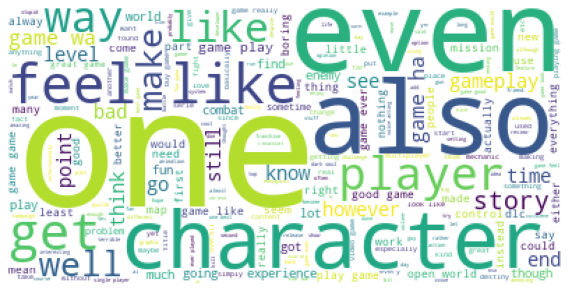

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(reviews_wc)
ax.axis('off')
plt.show()

In [22]:
nltk.FreqDist(nltk.Text(nltk.word_tokenize(text,"english"))).most_common(10)

[('game', 217610),
 ('like', 45534),
 ('wa', 43835),
 ('story', 33670),
 ('time', 30647),
 ('one', 28907),
 ('play', 28636),
 ('get', 28519),
 ('good', 27737),
 ('really', 24750)]

In [23]:
stopwords=STOPWORDS

In [24]:
stopwords.update(["like", "wa", "one", "play", "get", 'good', 'really'])

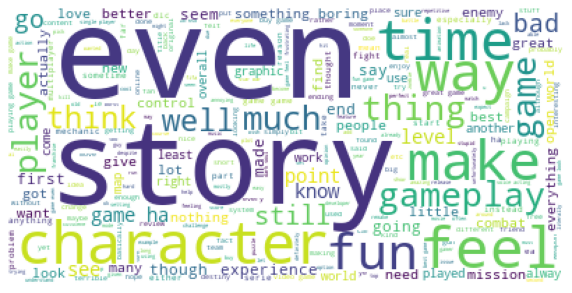

In [25]:
reviews_wc = WordCloud(background_color='white', max_words=len(df['reviews_usuarios_clean']), stopwords=stopwords)
reviews_wc.generate(text)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(reviews_wc)
ax.axis('off')
plt.show()

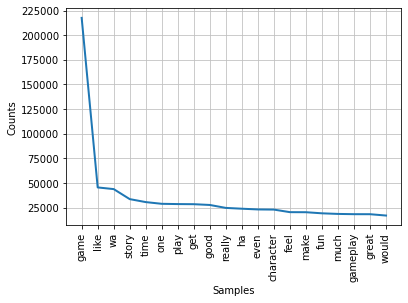

AxesSubplot(0.125,0.125;0.775x0.755)


In [26]:
print(nltk.FreqDist(nltk.Text(nltk.word_tokenize(text,"english"))).plot(20))

**Clasificación - Sentiment analysis**

In [81]:
tfidf = TfidfTransformer()

In [82]:
%%time
X = tfidf.fit_transform(bag).toarray()
y = np.asarray(df4['target'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

MemoryError: Unable to allocate 63.5 GiB for an array with shape (117401, 72566) and data type float64

Se presenta una limitación de memoria. Se decide coger una muestra de los comentarios para poder analizarla.

In [86]:
df_under1 = df4[df4['etiqueta']=='positiva'].sample(17989)
df_under2 = df4[df4['etiqueta']=='mixta'].sample(17989)
df5=pd.concat([df_under1,df_under2, df4[df4['etiqueta']=='negativa']], axis=0, ignore_index=True)
df6=pd.concat([df_under1, df4[df4['etiqueta']=='negativa']], axis=0, ignore_index=True)


In [97]:
df5.to_pickle('/Users/Eugenio/Documents/proyecto_df5_usuarios.pkl') 
df6.to_pickle('/Users/Eugenio/Documents/proyecto_df6_usuarios.pkl') 
pickle.dump(df5, open('/Users/Eugenio/Documents/proyecto_df5_usuarios_protocolo.pkl', 'wb'), protocol=3)
pickle.dump(df6, open('/Users/Eugenio/Documents/proyecto_df6_usuarios_protocolo.pkl', 'wb'), protocol=3)

In [84]:
df5

,index,Titulo,Plataforma,Fecha_salida,Puntuacion_usuarios,Numero_criticas_usuarios_positivas,Numero_criticas_usuarios_mixtas,Numero_criticas_usuarios_negativas,Puntuaciones_usuarios,Usuarios,Fecha_review_usuarios,Reviews_usarios,Usuarios_ayudados,Usuarios_ayudados_total,etiqueta,reviews_usuarios_clean,language,target
0,139,Ratchet & Clank,PlayStation 4,"Apr 12, 2016",8.5,1.725,214.0,114.000,10.0,Gittoplo,"Oct 11, 2017",Awesome game. Has 90s flavour with modern day ...,0,1,positiva,"[awesome, game, ha, flavour, modern, day, grap...",en,0
1,497,NHL 16,PlayStation 4,"Sep 15, 2015",5.5,67.000,42.0,64.000,10.0,Acoomoo,"Feb 25, 2016","I'm a big fan of this installment. However, i ...",0,0,positiva,"[big, fan, installment, however, played, new, ...",en,0
2,168,Uncharted: The Lost Legacy,PlayStation 4,"Aug 22, 2017",8.0,1.342,205.0,164.000,8.0,MrSnaztastic,"Aug 25, 2017",This surprised me a bit. Definitely a lot more...,3,8,positiva,"[surprised, bit, definitely, lot, enjoyable, e...",en,0
3,194,Kingdom Hearts III,PlayStation 4,"Jan 29, 2019",8.0,1.722,284.0,325.000,9.0,Ritscher,"Feb 2, 2019","Couldn't decide on 8 or 9, went with 9 in the ...",8,11,positiva,"[decide, went, end, game, incredibly, fun, ha,...",en,0
4,1653,Cyberpunk 2077,PlayStation 4,"Dec 10, 2020",3.2,2.092,351.0,5.696,10.0,ABTA,"Dec 12, 2020",The best game ever made from the best deves ev...,0,6,positiva,"[best, game, ever, made, best, deves, ever, cd...",en,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70328,1786,Road Rage,PlayStation 4,"Nov 14, 2017",2.3,4.000,0.0,23.000,1.0,TheLastofMe,"Aug 1, 2019",There's no dancing around it: Road Rage is ter...,0,0,negativa,"[dancing, around, road, rage, terrible, gamepl...",en,2
70329,1786,Road Rage,PlayStation 4,"Nov 14, 2017",2.3,4.000,0.0,23.000,1.0,JakeK86,"Sep 9, 2019",Handling is stiff and absolutely terrible. The...,0,0,negativa,"[handling, stiff, absolutely, terrible, graphi...",en,2
70330,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.000,0.0,SZJX,"May 4, 2018",This series might have tried to look cool on t...,1,1,negativa,"[series, might, tried, look, cool, surface, li...",en,2
70331,1787,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"Sep 22, 2015",2.7,13.000,1.0,45.000,0.0,WatsonStudios,"Dec 23, 2015",Welcome to the very definition of AWFUL.\n\nAf...,2,3,negativa,"[welcome, definition, awful, afro, samurai, le...",en,2


In [85]:
%%time
frases = df5['reviews_usuarios_clean'].apply(lambda x:' '.join(x))
count = CountVectorizer()
frases = np.array(frases)
bag = count.fit_transform(frases)
X = tfidf.fit_transform(bag).toarray()
y = np.asarray(df5['target'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

MemoryError: Unable to allocate 21.4 GiB for an array with shape (49233, 58311) and data type float64

In [87]:
%%time
frases = df6['reviews_usuarios_clean'].apply(lambda x:' '.join(x))
count = CountVectorizer()
frases = np.array(frases)
bag = count.fit_transform(frases)
X = tfidf.fit_transform(bag).toarray()
y = np.asarray(df6['target'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

MemoryError: Unable to allocate 13.0 GiB for an array with shape (36640, 47721) and data type float64

Nos encontramos con el mismo problema, se decide tomar una muestra menor

In [88]:
df_under1 = df4[df4['etiqueta']=='positiva'].sample(7000)
df_under2 = df4[df4['etiqueta']=='mixta'].sample(7000)
df_under3 = df4[df4['etiqueta']=='negativa'].sample(7000)
df7=pd.concat([df_under1,df_under2, df_under3], axis=0, ignore_index=True)
df8=pd.concat([df_under1, df_under3], axis=0, ignore_index=True)

In [89]:
%%time
frases = df7['reviews_usuarios_clean'].apply(lambda x:' '.join(x))
count = CountVectorizer()
frases = np.array(frases)
bag = count.fit_transform(frases)
X = tfidf.fit_transform(bag).toarray()
y = np.asarray(df7['target'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14700, 33501) (14700,)
Test set: (6300, 33501) (6300,)
Wall time: 23.2 s


0.4874603174603175
[[1386  407  329]
 [ 943  658  508]
 [ 657  385 1027]]
              precision    recall  f1-score   support

           0       0.46      0.65      0.54      2122
           1       0.45      0.31      0.37      2109
           2       0.55      0.50      0.52      2069

    accuracy                           0.49      6300
   macro avg       0.49      0.49      0.48      6300
weighted avg       0.49      0.49      0.48      6300



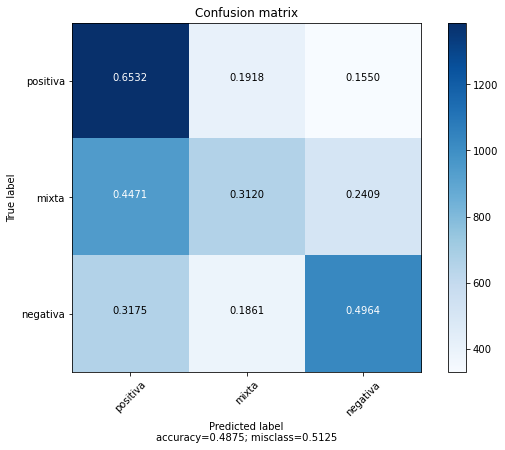

Wall time: 42.8 s


In [93]:
%%time
pipe = Pipeline([('GNB',GaussianNB())])
pipe.fit(X_train,y_train)
print(pipe.score(X_test, y_test))
yhat=pipe.predict(X_test)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
plot_confusion_matrix(cm, ['positiva', 'mixta', 'negativa'], title='Confusion matrix', cmap=None, normalize=True)

0.6780952380952381
[[1429  502  191]
 [ 412 1302  395]
 [ 148  380 1541]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70      2122
           1       0.60      0.62      0.61      2109
           2       0.72      0.74      0.73      2069

    accuracy                           0.68      6300
   macro avg       0.68      0.68      0.68      6300
weighted avg       0.68      0.68      0.68      6300



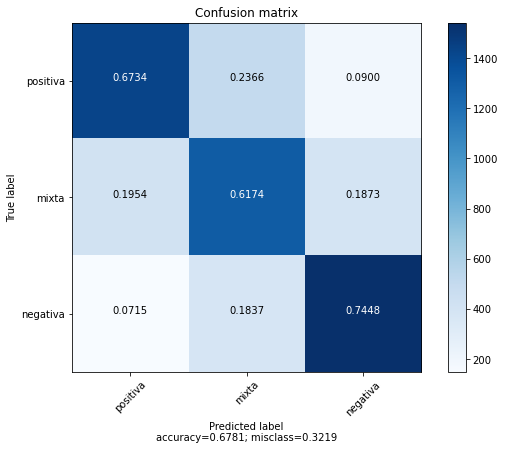

Wall time: 13min 48s


In [94]:
%%time
pipe = Pipeline([('clf', RandomForestClassifier(n_estimators=250))])
pipe.fit(X_train,y_train)
print(pipe.score(X_test, y_test))
yhat=pipe.predict(X_test)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
plot_confusion_matrix(cm, ['positiva', 'mixta', 'negativa'], title='Confusion matrix', cmap=None, normalize=True)

0.7214285714285714
[[1572  397  153]
 [ 367 1336  406]
 [ 108  324 1637]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      2122
           1       0.65      0.63      0.64      2109
           2       0.75      0.79      0.77      2069

    accuracy                           0.72      6300
   macro avg       0.72      0.72      0.72      6300
weighted avg       0.72      0.72      0.72      6300



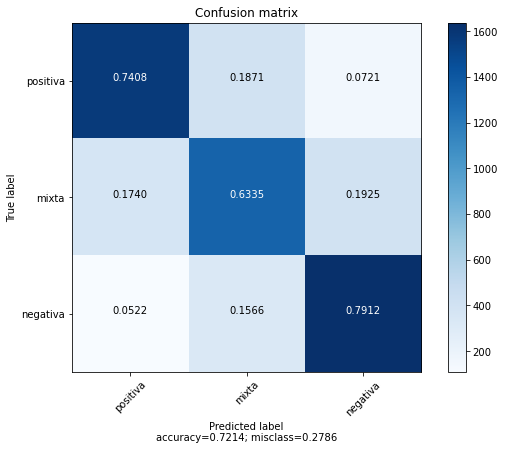

Wall time: 3min 52s


In [95]:
%%time
pipe = Pipeline([('clf', LogisticRegression(max_iter=200))])
pipe.fit(X_train,y_train)
print(pipe.score(X_test, y_test))
yhat=pipe.predict(X_test)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
plot_confusion_matrix(cm, ['positiva', 'mixta', 'negativa'], title='Confusion matrix', cmap=None, normalize=True)

In [98]:
%%time
frases = df8['reviews_usuarios_clean'].apply(lambda x:' '.join(x))
count = CountVectorizer()
frases = np.array(frases)
bag = count.fit_transform(frases)
X = tfidf.fit_transform(bag).toarray()
y = np.asarray(df8['target'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (9800, 25998) (9800,)
Test set: (4200, 25998) (4200,)
Wall time: 7.44 s


0.7092857142857143
[[1643  488]
 [ 733 1336]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      2131
           2       0.73      0.65      0.69      2069

    accuracy                           0.71      4200
   macro avg       0.71      0.71      0.71      4200
weighted avg       0.71      0.71      0.71      4200



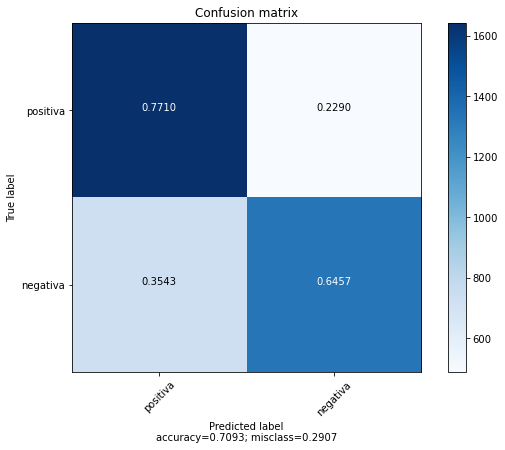

Wall time: 21.7 s


In [102]:
%%time
pipe = Pipeline([('GNB',GaussianNB())])
pipe.fit(X_train,y_train)
print(pipe.score(X_test, y_test))
yhat=pipe.predict(X_test)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
plot_confusion_matrix(cm, ['positiva', 'negativa'], title='Confusion matrix', cmap=None, normalize=True)

0.8971428571428571
[[1901  230]
 [ 202 1867]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2131
           2       0.89      0.90      0.90      2069

    accuracy                           0.90      4200
   macro avg       0.90      0.90      0.90      4200
weighted avg       0.90      0.90      0.90      4200



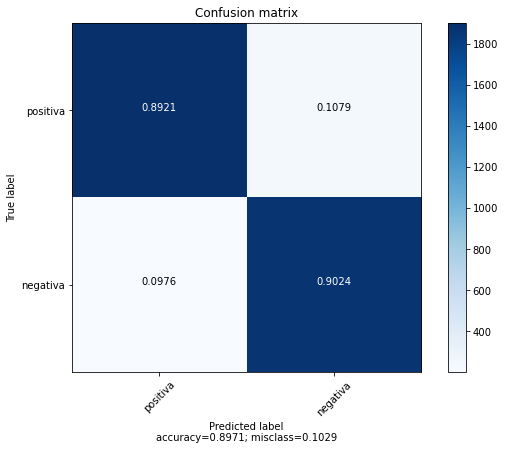

Wall time: 14.6 s


In [103]:
%%time
pipe = Pipeline([('clf', LogisticRegression(max_iter=200))])
pipe.fit(X_train,y_train)
print(pipe.score(X_test, y_test))
yhat=pipe.predict(X_test)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
plot_confusion_matrix(cm, ['positiva', 'negativa'], title='Confusion matrix', cmap=None, normalize=True)

0.8807142857142857
[[1938  193]
 [ 308 1761]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2131
           2       0.90      0.85      0.88      2069

    accuracy                           0.88      4200
   macro avg       0.88      0.88      0.88      4200
weighted avg       0.88      0.88      0.88      4200



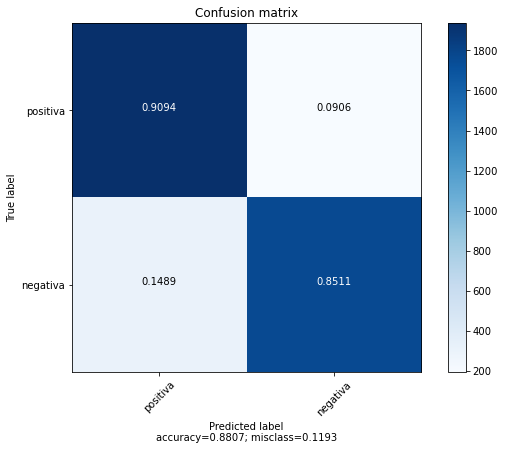

Wall time: 4min 4s


In [104]:
%%time
pipe = Pipeline([('clf', RandomForestClassifier())])
pipe.fit(X_train,y_train)
print(pipe.score(X_test, y_test))
yhat=pipe.predict(X_test)
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))
cm = confusion_matrix(y_test, yhat)
plot_confusion_matrix(cm, ['positiva', 'negativa'], title='Confusion matrix', cmap=None, normalize=True)

Los resultados obtenidos muestran una buena clasificación, pero solo se puede hacer sobre un muestreo de la población. Para poder analizar todos los comentarios se emplearan redes neuronales convolucionales.